Preprocessing for numerical features
In this notebook, we will still use only numerical features.

We will introduce these new aspects:

an example of preprocessing, namely scaling numerical variables;
using a scikit-learn pipeline to chain preprocessing and model training.

## Data preparation

First, let’s load the full adult census dataset.

In [111]:
import pandas as pd
import numpy as np

adult_census = pd.read_csv("/Users/russconte/Adult_Census.csv")

We will now drop the target from the data we will use to train our predictive model.

In [112]:
target_name = "Class"
target = adult_census[target_name]
data = adult_census.drop(columns=target_name)

Next we create a data set of only numerical columns:

In [113]:
numerical_columns = adult_census.select_dtypes(include=np.number)

Finally, we can divide our dataset into a train and test sets.

In [114]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    numerical_columns, target, random_state=42)

## Model fitting with preprocessing

A range of preprocessing algorithms in scikit-learn allow us to transform the input data before training a model. In our case, we will standardize the data and then train a new logistic regression model on that new version of the dataset.

Let’s start by printing some statistics about the training data.

In [115]:
data_train.describe()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,36631.000000,3.663100e+04,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.642352,1.896808e+05,10.078131,1087.077721,89.665311,40.431247
std,13.725748,1.055987e+05,2.570143,7522.692939,407.110175,12.423952
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177245e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.780330e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377310e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Here are some reasons for scaling features:

Models that rely on the distance between a pair of samples, for instance k-nearest neighbors, should be trained on normalized features to make each feature contribute approximately equally to the distance computations.
Many models such as logistic regression use a numerical solver (based on gradient descent) to find their optimal parameters. This solver converges faster when the features are scaled.

Whether or not a machine learning model requires scaling the features depends on the model family. Linear models such as logistic regression generally benefit from scaling the features while other models such as decision trees do not need such preprocessing (but will not suffer from it).

We show how to apply such normalization using a scikit-learn transformer called StandardScaler. This transformer shifts and scales each feature individually so that they all have a 0-mean and a unit standard deviation.

We will investigate different steps used in scikit-learn to achieve such a transformation of the data.

First, one needs to call the method fit in order to learn the scaling from the data.

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

data_train.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
27859,41,27187,11,0,2415,12
5654,39,319052,13,0,0,37
3779,34,260560,13,0,0,50
10522,56,368797,14,0,0,40
22461,71,163293,15,0,0,2


We can inspect the computed means and standard deviations.

In [117]:
scaler.mean_

array([3.86423521e+01, 1.89680787e+05, 1.00781305e+01, 1.08707772e+03,
       8.96653108e+01, 4.04312468e+01])

In [118]:
scaler.scale_

array([1.37255608e+01, 1.05597263e+05, 2.57010781e+00, 7.52259026e+03,
       4.07104618e+02, 1.24237826e+01])

Once we have called the fit method, we can perform data transformation by calling the method transform.

In [119]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled[0:5,]

array([[ 0.17177061, -1.53880682,  0.35868902, -0.14450843,  5.71188483,
        -2.28845333],
       [ 0.02605707,  1.22513794,  1.1368665 , -0.14450843, -0.22025127,
        -0.27618374],
       [-0.33822677,  0.67122207,  1.1368665 , -0.14450843, -0.22025127,
         0.77019645],
       [ 1.26462212,  1.69622023,  1.52595523, -0.14450843, -0.22025127,
        -0.03471139],
       [ 2.35747364, -0.24989083,  1.91504397, -0.14450843, -0.22025127,
        -3.09336116]])

In [120]:
data_train_scaled = pd.DataFrame(data_train_scaled,
                                 columns=data_train.columns)
data_train_scaled.describe()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04
mean,-2.273364e-16,-6.168343e-17,1.219606e-16,3.530310e-17,3.840667e-17,1.844684e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.576792e+00,-1.679928e+00,-3.532198e+00,-1.445084e-01,-2.202513e-01,-3.173852e+00
25%,-7.753674e-01,-6.814219e-01,-4.194885e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
50%,-1.196565e-01,-1.103039e-01,-3.039972e-02,-1.445084e-01,-2.202513e-01,-3.471139e-02
75%,6.817680e-01,4.550327e-01,7.477778e-01,-1.445084e-01,-2.202513e-01,3.677425e-01
max,3.741752e+00,1.226380e+01,2.304133e+00,1.314865e+01,1.047970e+01,4.714245e+00


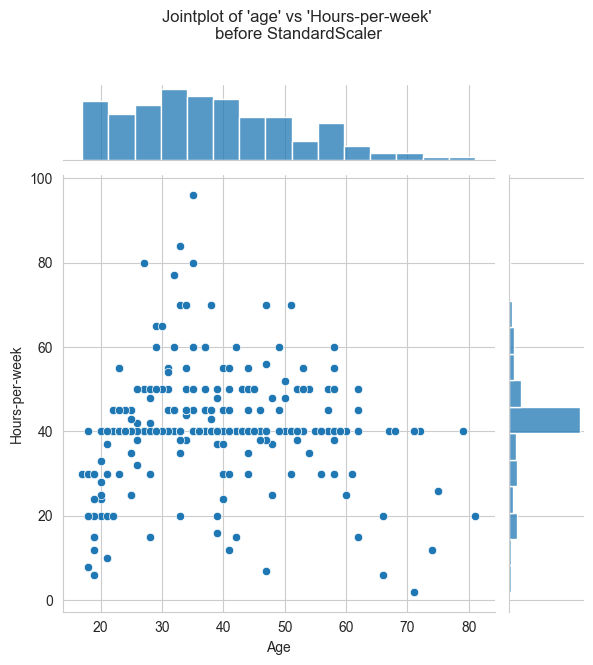

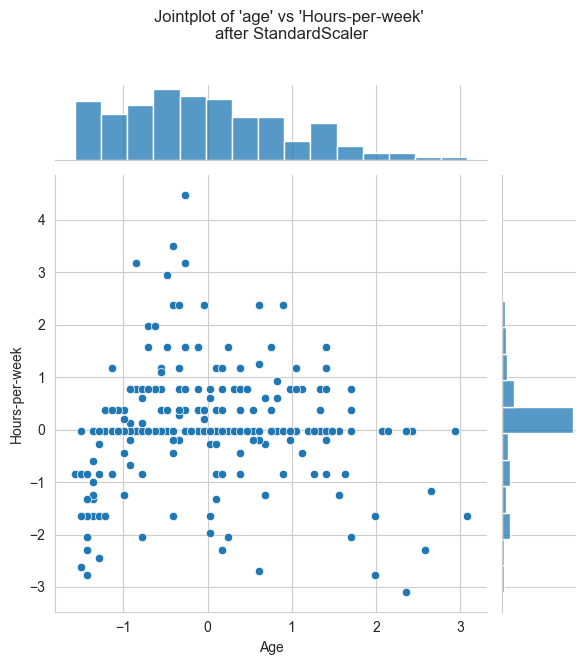

In [121]:
import matplotlib.pyplot  as plt
import seaborn as sns

# number of points to visualize to have a clearer plot
num_points_to_plot = 300

sns.jointplot(data=data_train[:num_points_to_plot], x="Age",
              y="Hours-per-week", marginal_kws=dict(bins=15))
plt.suptitle("Jointplot of 'age' vs 'Hours-per-week' \nbefore StandardScaler", y=1.1)

sns.jointplot(data=data_train_scaled[:num_points_to_plot], x="Age",
              y="Hours-per-week", marginal_kws=dict(bins=15))
_ = plt.suptitle("Jointplot of 'age' vs 'Hours-per-week' \nafter StandardScaler", y=1.1)

# Pipelines:

We can easily combine sequential operations with a scikit-learn Pipeline, which chains together operations and is used as any other classifier or regressor. The helper function make_pipeline will create a Pipeline: it takes as arguments the successive transformations to perform, followed by the classifier or regressor model.

In [122]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

The make_pipeline function did not require us to give a name to each step. Indeed, it was automatically assigned based on the name of the classes provided; a StandardScaler will be a step named "standardscaler" in the resulting pipeline. We can check the name of each steps of our model:

In [123]:
model.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

This predictive pipeline exposes the same methods as the final predictor: fit and predict (and additionally predict_proba, decision_function, or score).

In [124]:
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [125]:
elapsed_time

0.07103919982910156

When calling model.fit, the method fit_transform from each underlying transformer (here a single transformer) in the pipeline will be called to:

learn their internal model states
transform the training data. Finally, the preprocessed data are provided to train the predictor.
To predict the targets given a test set, one uses the predict method.

In [126]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

The method transform of each transformer (here a single transformer) is called to preprocess the data. Note that there is no need to call the fit method for these transformers because we are using the internal model states computed when calling model.fit. The preprocessed data is then provided to the predictor that will output the predicted target by calling its method predict.

As a shorthand, we can check the score of the full predictive pipeline calling the method model.score. Thus, let’s check the computational and generalization performance of such a predictive pipeline.

In [127]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

The accuracy using a Pipeline is 0.819 with a fitting time of 0.071 seconds in 14 iterations


We could compare this predictive model with the predictive model used in the previous notebook which did not scale features.

In [128]:
model = LogisticRegression()
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [129]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model.n_iter_[0]} iterations")

The accuracy using a LogisticRegression is 0.804 with a fitting time of 0.118 seconds in 55 iterations
